<h1><center>PYTHON SPLAT 2</center></h1>

<h2><center>BIOC3301</center></h2> 

# Download dataset

In [1]:
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz 

--2017-12-16 10:54:06--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => ‘SRR003265.filt.fastq.gz’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.192.8
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.192.8|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... done.    ==> RETR SRR003265.filt.fastq.gz ... done.
Length: 28919712 (28M) (unauthoritative)

SRR003265.filt.fast 100%[===================>]  27.58M  3.69MB/s    in 7.7s    

2017-12-16 10:54:14 (3.60 MB/s) - ‘SRR003265.filt.fastq.gz’ saved [28919712]



In [2]:
!zcat SRR003265.filt.fastq.gz > SRR003265.fastq

In [3]:
!head SRR003265.fastq

@SRR003265.31 3042NAAXX:3:1:1252:1819 length=51
GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
+
IIIIIIIIIIIIIIIIIII?8IAD>I1IIAD@IIH7I95=@-@+7=.;588
@SRR003265.216 3042NAAXX:3:1:433:1251 length=51
GAAATTTGTTTGCAGACCTCTGTGCAAACAAATTTCAGATTGGAAGAGCGT
+
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIFIIIIIIIIC;6I?II
@SRR003265.404 3042NAAXX:3:1:1902:1672 length=51
GATAATGATCTGAAGTTTTATTTTTTCACCAGGTCTCTGCCACATTTTTGT


# Data analysis with Biopython 

## Simple quality filtering for FASTQ files 

In [4]:
from Bio import SeqIO 
count = sum(1 for seq in SeqIO.parse("SRR003265.fastq", "fastq"))

In [5]:
print(count)

508226


### Filtering for a minimum PHRED quality of 20 

In [6]:
good_reads = (rec for rec in SeqIO.parse("SRR003265.fastq", "fastq")
              if min(rec.letter_annotations["phred_quality"]) >= 20) 
count = SeqIO.write(good_reads, "good_quality.fastq", "fastq") 
print("Saved %i reads" % count) 

Saved 5102 reads


In [7]:
from collections import defaultdict 

recs = SeqIO.parse('SRR003265.fastq', "fastq")

cnt = defaultdict(int)
for rec in recs: 
    for letter in rec.seq: 
        cnt[letter] += 1 
        tot = sum(cnt.values()) 
        
print('Nucleotide |   %   |  Count')
print('-'*28)
for letter, cnt_value in cnt.items(): 
    print('{:>5}      | {:>5.2f} | {:>7}'.format(letter, 100. * cnt_value / tot, cnt_value)) 

Nucleotide |   %   |  Count
----------------------------
    G      | 20.68 | 5359334
    A      | 28.60 | 7411965
    C      | 21.00 | 5444053
    T      | 29.58 | 7666885
    N      |  0.14 |   37289


## Plot the distribution of nucleotides (Ns) according to read position 

In [8]:
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", family="Times New Roman")

In [9]:
n_cnt = defaultdict(int) 
recs = SeqIO.parse('SRR003265.fastq', "fastq")

for rec in recs: 
    for i, letter in enumerate(rec.seq): 
        pos = i + 1 
        if letter == 'N':
            n_cnt[pos] += 1 
            
seq_len = max(n_cnt.keys()) 
positions = range(1, seq_len +1) 

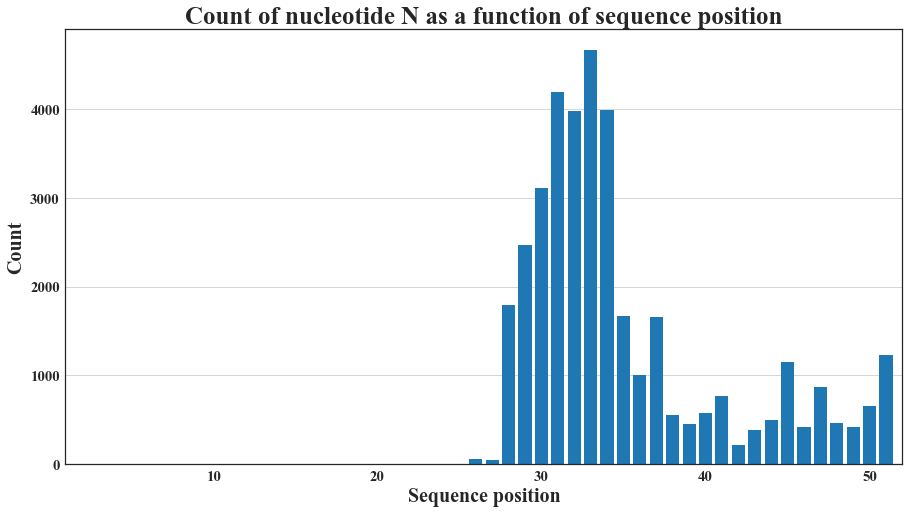

In [10]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 15}):
    fig, ax = plt.subplots(figsize=(15,8)) 
    ax.bar(positions, [n_cnt[x] for x in positions]) 
    ax.set_title('Count of nucleotide N as a function of sequence position')
    ax.set_ylabel('Count')
    ax.set_xlabel('Sequence position')
    ax.grid(axis='y')
    ax.set_xlim(1, seq_len+1)

## First look at the distribution of nucleotide reads 

In [11]:
cnt_qual = defaultdict(int) 
recs = SeqIO.parse('SRR003265.fastq', "fastq")

for rec in recs: 
    for i, qual in enumerate( rec.letter_annotations['phred_quality']):
        if i < 25:
            continue 
        cnt_qual[qual] += 1 
        tot = sum(cnt_qual.values()) 

print('Qual |   %  |  Count')
print('-'*21)
for qual, cnt in cnt_qual.items():
    print('{:<2}   | {:>5.2f}| {:>7}'.format(qual, 100. * cnt / tot, cnt)) 

Qual |   %  |  Count
---------------------
40   | 22.76| 3007221
16   |  2.05|  270431
32   |  1.03|  136763
35   |  0.91|  120704
31   |  1.08|  142464
39   |  0.78|  102568
22   |  1.59|  209905
24   |  1.46|  193259
20   |  1.73|  228923
28   |  1.23|  162226
12   |  2.35|  309918
10   |  4.95|  654154
13   |  2.28|  301033
26   |  1.33|  176263
23   |  1.52|  201164
37   |  0.84|  111179
34   |  0.95|  125624
21   |  1.66|  219602
30   |  1.13|  149449
33   |  0.99|  131291
25   |  1.40|  184846
17   |  1.97|  259779
38   |  0.80|  106290
4    |  4.77|  630923
36   |  0.88|  115701
18   |  1.88|  248982
11   |  2.41|  318303
19   |  1.81|  239621
5    |  4.88|  645266
9    |  2.51|  332259
3    |  4.04|  533458
27   |  1.28|  168902
8    |  2.53|  334410
29   |  1.17|  154892
15   |  2.12|  280719
7    |  2.51|  331743
2    |  3.77|  498679
14   |  2.20|  291341
6    |  2.50|  330834
1    |  1.52|  200558
0    |  0.40|   52229


## Analyse the distribution of PHRED quality scores in FASTQ sequences 

In [12]:
recs = SeqIO.parse('SRR003265.fastq', 'fastq') 

qual_pos = defaultdict(list) 

for rec in recs: 
    for i, qual in enumerate(rec.letter_annotations['phred_quality']): 
        if i < 25 or qual == 40: 
            continue 
        pos = i + 1 
        qual_pos[pos].append(qual) 
        
vps = [] 
poses = qual_pos.keys() 
poses = sorted(poses)

for pos in poses:
    vps.append(qual_pos[pos]) 

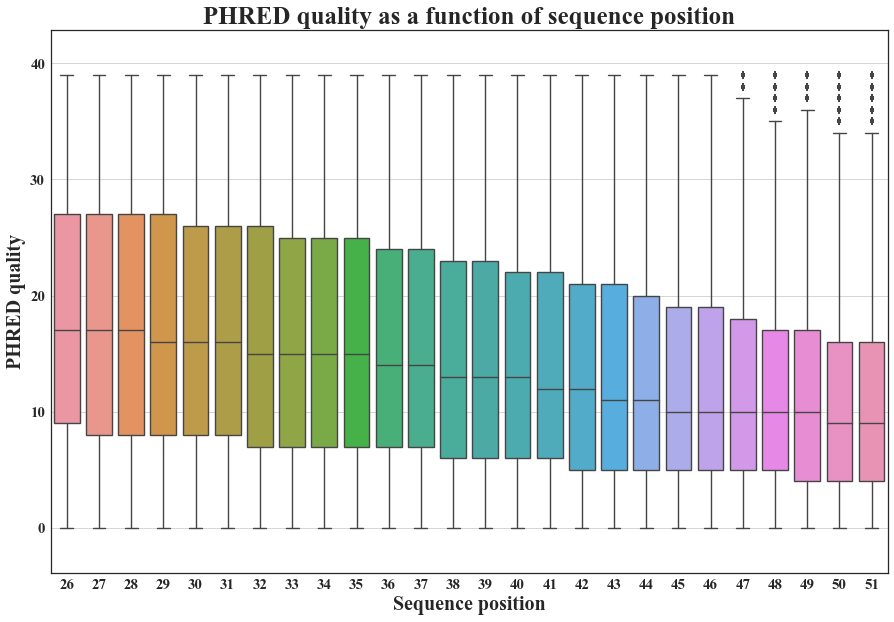

In [13]:
with sns.plotting_context(rc={"axes.titlesize":25,"axes.labelsize":20, 'xtick.labelsize': 15,
                              'ytick.labelsize': 15, 'legend.fontsize': 15}):
    fig, ax = plt.subplots(figsize=(15,10))
    sns.boxplot(data=vps, ax=ax) 
    ax.set_xticklabels([str(x) for x in range (26, max(qual_pos.keys()) + 1)]) 
    ax.set_title('PHRED quality as a function of sequence position')
    ax.set_ylabel('PHRED quality')
    ax.set_xlabel('Sequence position')
    ax.grid(axis='y')
    ax.margins(0.1)